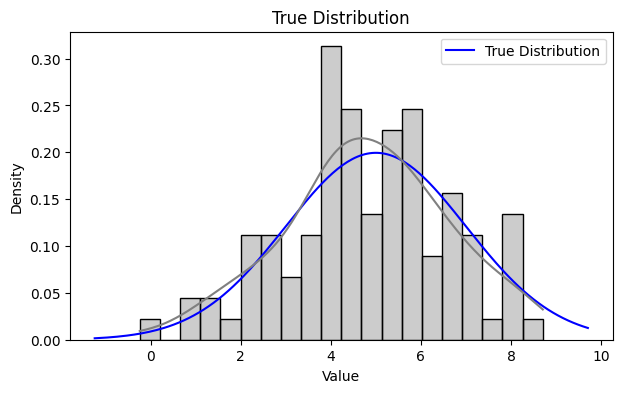

20:49:05 - cmdstanpy - INFO - compiling stan file /home/maria/MITNeuralComputation/bayesian_course/normal_model.stan to exe file /home/maria/MITNeuralComputation/bayesian_course/normal_model
20:49:13 - cmdstanpy - INFO - compiled model executable: /home/maria/MITNeuralComputation/bayesian_course/normal_model
20:49:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

20:49:13 - cmdstanpy - INFO - CmdStan done processing.
20:49:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'normal_model.stan', line 11, column 2 to column 24)
Consider re-running with show_console=True if the above output is unclear!



            Mean      MCSE    StdDev       MAD         5%        50%  \
lp__  -109.61300  0.025049  1.035680  0.731626 -111.80400 -109.30200   
mu       4.78966  0.003406  0.186529  0.185660    4.47835    4.78996   
sigma    1.84033  0.002298  0.133621  0.126713    1.63279    1.83128   

             95%  ESS_bulk  ESS_tail  ESS_bulk/s    R_hat  
lp__  -108.63500   1767.92   2606.17     53573.4  1.00155  
mu       5.08906   3029.36   2034.56     91798.8  1.00186  
sigma    2.07896   3417.91   2418.84    103573.0  1.00277  
Posterior mean of mu: 4.790
Posterior mean of sigma: 1.840


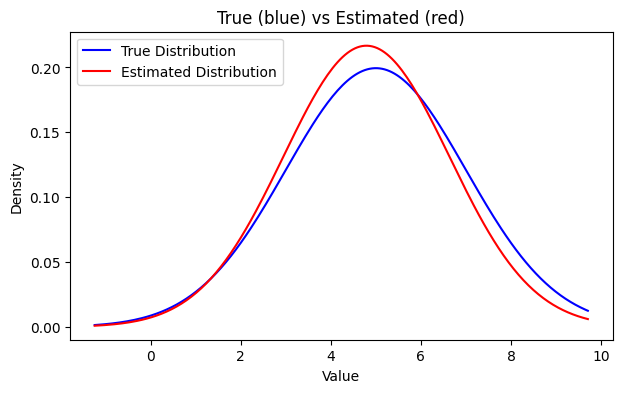

In [2]:
# ===============================================================
# Bayesian estimation of Normal(mu, sigma) parameters with Stan
# Python version of the R code from the course
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cmdstanpy import CmdStanModel

# ---------------------------------------------------------------
# 1. Generate synthetic data
# ---------------------------------------------------------------
np.random.seed(42)

n = 100
true_mean = 5
true_sd = 2

y = np.random.normal(loc=true_mean, scale=true_sd, size=n)

# Plot true distribution
x_vals = np.linspace(min(y) - 1, max(y) + 1, 200)
true_density = (
    1 / (true_sd * np.sqrt(2 * np.pi))
    * np.exp(-0.5 * ((x_vals - true_mean) / true_sd) ** 2)
)

plt.figure(figsize=(7, 4))
plt.plot(x_vals, true_density, color="blue", label="True Distribution")
sns.histplot(y, kde=True, stat="density", bins=20, color="gray", alpha=0.4)
plt.title("True Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# ---------------------------------------------------------------
# 2. Define Stan model (same as R version)
# ---------------------------------------------------------------
stan_model_code = """
data {
  int<lower=0> N;       // Number of data points
  array[N] real y;       // Observations (new syntax)
}
parameters {
  real mu;              // Mean parameter
  real<lower=0> sigma;  // Standard deviation parameter
}
model {
  y ~ normal(mu, sigma);  // Likelihood
}
"""
# Save model to file for CmdStan
with open("normal_model.stan", "w") as f:
    f.write(stan_model_code)

# ---------------------------------------------------------------
# 3. Compile and fit the model
# ---------------------------------------------------------------
stan_model = CmdStanModel(stan_file="normal_model.stan")

fit = stan_model.sample(
    data={"N": n, "y": y},
    iter_sampling=1000,
    chains=4,
    seed=123,
)

print(fit.summary())

# ---------------------------------------------------------------
# 4. Extract posterior samples
# ---------------------------------------------------------------
posterior_df = fit.draws_pd()
mu_mean = posterior_df["mu"].mean()
sigma_mean = posterior_df["sigma"].mean()

print(f"Posterior mean of mu: {mu_mean:.3f}")
print(f"Posterior mean of sigma: {sigma_mean:.3f}")

# ---------------------------------------------------------------
# 5. Plot true vs estimated distributions
# ---------------------------------------------------------------
estimated_density = (
    1 / (sigma_mean * np.sqrt(2 * np.pi))
    * np.exp(-0.5 * ((x_vals - mu_mean) / sigma_mean) ** 2)
)

plt.figure(figsize=(7, 4))
plt.plot(x_vals, true_density, color="blue", label="True Distribution")
plt.plot(x_vals, estimated_density, color="red", label="Estimated Distribution")
plt.title("True (blue) vs Estimated (red)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


In [7]:
from cmdstanpy import install_cmdstan
install_cmdstan()

CmdStan install directory: /home/maria/.cmdstan
Installing CmdStan version: 2.37.0
Download successful, file: /tmp/tmpru4j22xm
Extracting distribution
Unpacked download as cmdstan-2.37.0
Building version cmdstan-2.37.0, may take several minutes, depending on your system.
Installed cmdstan-2.37.0
Test model compilation


True

In [6]:
!pip install --upgrade cmdstanpy
